In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_pickle('../saved_frames/uniform_users_s')

In [5]:
df.head()

,dimension,user_draw,num_users,num_producers,num_iters,NE,producer_dist,user_dist
0,5,0,10000,100,"[15, 6, 13, 12, 12, 12, 6, 13, 13, 3, 16, 12, ...","[20.0, 21.0, 19.0, 19.0, 21.0]","[0.2, 0.21, 0.19, 0.19, 0.21]","[0.2004279908273688, 0.20078002329014444, 0.19..."
1,5,1,10000,100,"[6, 9, 5, 9, 6, 6, 6, 9, 10, 16, 11, 10, 14, 8...","[17.0, 19.0, 21.0, 22.0, 21.0]","[0.17, 0.19, 0.21, 0.22, 0.21]","[0.19622756304484776, 0.19862866013688202, 0.2..."
2,5,2,10000,100,"[4, 8, 13, 10, 2, 6, 12, 7, 15, 12, 13, 21, 11...","[19.0, 20.0, 21.0, 21.0, 19.0]","[0.19, 0.2, 0.21, 0.21, 0.19]","[0.19828060760023797, 0.2000865819399328, 0.20..."
3,5,3,10000,100,"[10, 8, 17, 9, 12, 7, 14, 14, 6, 9, 7, 6, 8, 7...","[21.0, 20.0, 21.0, 19.0, 19.0]","[0.21, 0.2, 0.21, 0.19, 0.19]","[0.2008020682774922, 0.20159366537787254, 0.20..."
4,5,4,10000,100,"[9, 15, 7, 4, 13, 14, 12, 14, 18, 10, 12, 15, ...","[21.0, 19.0, 20.0, 20.0, 20.0]","[0.21, 0.19, 0.2, 0.2, 0.2]","[0.2012262613773008, 0.19850349784622717, 0.20..."


### number of iterations d = 5, 10, 15, n_prod = 100, n_users = 10000, draws taken 10 times

In [8]:
df_dim5 = df[df['dimension'] == 5]
num_iters_dim5_across_draws = np.array(df_dim5.num_iters.to_list())
num_iters_dim5_across_draws.mean(), num_iters_dim5_across_draws.std()

(10.36, 3.448245930904581)

In [9]:
df_dim10 = df[df['dimension'] == 10]
num_iters_dim10_across_draws = np.array(df_dim10.num_iters.to_list())
num_iters_dim10_across_draws.mean(), num_iters_dim10_across_draws.std()

(16.755, 3.854215224919335)

In [10]:
df_dim15 = df[df['dimension'] == 15]
num_iters_dim15_across_draws = np.array(df_dim15.num_iters.to_list())
num_iters_dim15_across_draws.mean(), num_iters_dim15_across_draws.std()

(21.505, 3.853566529852573)

### Representative sample of NE producer spread, and average users in each direction

In [56]:
seed = 13

In [63]:
df_dim5_rand_row = df_dim5.sample(n=1, random_state=seed)
pd_5, ud_5 = df_dim5_rand_row['producer_dist'].iloc[0], df_dim5_rand_row['user_dist'].iloc[0]
print(pd_5, ud_5)

[0.21 0.2  0.21 0.19 0.19] [0.20080207 0.20159367 0.20089622 0.19871976 0.19798828]


In [64]:
df_dim10_rand_row = df_dim10.sample(n=1, random_state=seed)
pd_10, ud_10 = df_dim10_rand_row['producer_dist'].iloc[0], df_dim10_rand_row['user_dist'].iloc[0]
print(pd_10, ud_10)

[0.09 0.1  0.1  0.1  0.11 0.12 0.1  0.08 0.08 0.12] [0.09934937 0.10062304 0.09999563 0.09995971 0.10074951 0.10174999
 0.10037545 0.0976615  0.09805109 0.10148471]


In [65]:
df_dim15_rand_row = df_dim15.sample(n=1, random_state=seed)
pd_15, ud_15  = df_dim15_rand_row['producer_dist'].iloc[0], df_dim15_rand_row['user_dist'].iloc[0]
print(pd_15, ud_15)

[0.09 0.05 0.08 0.06 0.06 0.07 0.05 0.07 0.04 0.07 0.07 0.07 0.08 0.08
 0.06] [0.06772556 0.06575526 0.0670628  0.0658633  0.06629241 0.06648079
 0.06608811 0.06654841 0.06540092 0.06722944 0.06704071 0.06714202
 0.06722719 0.06775367 0.06638941]


In [103]:
def user_producer_2bar_plot(pd, ud): #producer distribution and user distirbution
  dim = len(pd)
  y_max = max(max(ud), max(pd))
  
  x1, y1 = np.arange(dim), ud
  x2, y2 = np.arange(dim), pd

  fig, ax = plt.subplots()
  ax.bar(np.array(x1)-0.15, y1, width = 0.3, color='royalblue')
  ax.set_ylabel('Average User weight', fontsize=16)
  ax.set_xlabel('feature #', fontsize=16)
  plt.ylim(0, y_max)

  ax2 = ax.twinx()
  ax2.bar(np.array(x2)+0.15, y2, width = 0.3, color='seagreen')
  ax2.set_ylabel('Fraction of Producers', fontsize=16)
  plt.ylim(0, y_max)

  plt.xticks(range(N))
  plt.show()

In [94]:
# import numpy as np
# import matplotlib.pyplot as plt

# def plot_2bar_producer_user(pd, ud, savename): # producer distribution and user distribution
#   print(pd.shape, ud.shape)
#   print(np.sum(pd), np.sum(ud))
#   N = len(pd)
#   ind = np.arange(N)  # the x locations for the groups
#   width = 0.35       # the width of the bars
#   fig = plt.figure()
#   ax = fig.add_subplot(111)
#   # rects1 = ax.bar(ind, menMeans, width, color='royalblue', yerr=menStd)
#   rects1 = ax.bar(ind, ud, width, color='royalblue')
#   rects2 = ax.bar(ind+width, pd, width, color='seagreen')
#   ax
#   ax2 = ax.twinx()
#   ax.set_xlabel('feature #')
#   # ax.set_title('')
#   ax.set_xticks(ind + width / 2)
#   ax.set_xticklabels(range(1,N+1))
#   ax.legend( (rects1[0], rects2[0]), ('User fraction', 'Producer fraction'), loc='upper center')
#   plt.savefig(savename)
#   plt.show()

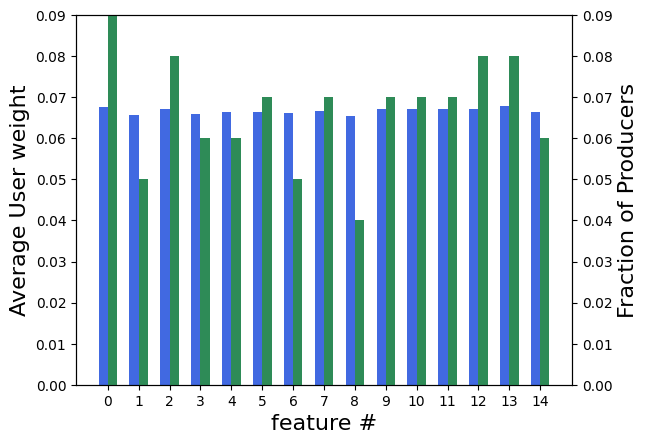

In [104]:
user_producer_2bar_plot(pd_15, ud_15)